<a href="https://colab.research.google.com/github/vaishnavikudmethe/WFH_Analysis_System_Using_ML/blob/main/WFH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_2020 = pd.read_csv('/content/sample_data/2020_rws.csv',encoding='cp1252')
df_2020

,Response ID,What year were you born?,What is your gender?,Which of the following best describes your industry?,Which of the following best describes your industry? (Detailed),Which of the following best describes your current occupation?,Which of the following best describes your current occupation? (Detailed),How many people are currently employed by your organisation?,Do you manage people as part of your current occupation?,Which of the following best describes your household?,...,Compare remote working to working at your employer’s workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employer’s workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employer’s workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employer’s workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employer’s workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employer’s workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employer’s workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employer’s workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employer’s workplace. Select the best aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employer’s workplace. Select the worst aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction
0,1,1972,Female,Manufacturing,Food Product Manufacturing,Clerical and administrative,Other Clerical and Administrative,Between 20 and 199,No,Couple with no dependent children,...,Managing my personal commitments,My opportunities to socialise,Preparing for work and commuting,My working relationships,Managing my personal commitments,The number of hours I work,My job satisfaction,The number of hours I work,Managing my personal commitments,My opportunities to socialise
1,2,1972,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,...,Preparing for work

In [ ]:
df_2020.shape

(1507, 73)

In [ ]:
df_2020=df_2020.iloc[:,0:41]

In [ ]:
df_2020.columns

Index(['Response ID', 'What year were you born?', 'What is your gender?',
       'Which of the following best describes your industry?',
       'Which of the following best describes your industry? (Detailed)',
       'Which of the following best describes your current occupation?',
       'Which of the following best describes your current occupation? (Detailed)',
       'How many people are currently employed by your organisation?',
       'Do you manage people as part of your current occupation?',
       'Which of the following best describes your household?',
       'How long have you been in your current job?', 'Metro / Regional',
       'Thinking about your current job, how much of your time did you spend remote working last year?',
       'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely',
       'Thinking about remote working last year, how strongly do you agree or 

In [ ]:
df_2020.describe()

,Response ID,What year were you born?,"On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? - Preparing for work and commuting","On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? - Working","On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? - Personal and family time","On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? - Caring and domestic responsibilities","On a day when you do remote work, how many hours would you spend doing the following activities? - Preparing for work and commuting","On a day when you do remote work, how many hours would you spend doing the following activities? - Working","On a day when you do remote work, how many hours would you spend doing the following activities? - Personal and family time","On a day when you do remote work, how many hours would you spend doing the following activities? - Caring and domestic responsibilities"
count,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000
mean,754.000000,1974.791639,1.795786,7.531128,3.969642,2.296981,0.668653,7.832887,4.660186,2.628832
std,435.177741,11.875588,1.379599,2.626245,3.114015,2.056728,1.345080,2.560533,3.182748,2.131725
min,1.000000,1900.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,377.500000,1965.000000,1.000000,7.000000,2.000000,1.000000,0.000000,7.000000,2.500000,1.000000
50%,754.000000,1975.000000,1.500000,8.000000,3.000000,2.000000,0.300000,8.000000,4.000000,2.000000
75%,1130.500000,1985.000000,2.000000,8.000000,5.000000,3.000000,1.000000,9.000000,6.000000,4.000000
max,1507.000000,2001.000000,20.000000,60.000000,20.000000,20.000000,20.000000,40.000000,20.000000,20.000000


In [ ]:
df_2020.duplicated().sum()

0

In [ ]:
# Check for null values in each column
for column in df_2020.columns:
    print(f"Column {column} has {df_2020[column].isnull().sum()} null values")

Column Response ID has 0 null values
Column What year were you born? has 0 null values
Column What is your gender? has 0 null values
Column Which of the following best describes your industry? has 0 null values
Column Which of the following best describes your industry? (Detailed) has 0 null values
Column Which of the following best describes your current occupation? has 0 null values
Column Which of the following best describes your current occupation? (Detailed) has 0 null values
Column How many people are currently employed by your organisation? has 0 null values
Column Do you manage people as part of your current occupation? has 136 null values
Column Which of the following best describes your household? has 0 null values
Column How long have you been in your current job? has 0 null values
Column Metro / Regional has 0 null values
Column Thinking about your current job, how much of your time did you spend remote working last year? has 0 null values
Column Thinking about remote work

In [ ]:
# Examining age
df_2020['What year were you born?'].describe()

count    1507.000000
mean     1974.791639
std        11.875588
min      1900.000000
25%      1965.000000
50%      1975.000000
75%      1985.000000
max      2001.000000
Name: What year were you born?, dtype: float64

In [ ]:
# Examining gender
df_2020['What is your gender?'].value_counts()

What is your gender?
Male              847
Female            658
Rather not say      2
Name: count, dtype: int64

In [ ]:
# Examining most common industry types
df_2020['Which of the following best describes your industry?'].value_counts()

Which of the following best describes your industry?
Professional, Scientific and Technical Services    259
Financial and Insurance Services                   173
Education and Training                             144
Information Media and Telecommunications           114
Health Care and Social Assistance                  103
Other Services                                      90
Retail Trade                                        87
Manufacturing                                       82
Public Administration and Safety                    81
Administrative and Support Services                 76
Transport, Postal and Warehousing                   57
Construction                                        56
Wholesale Trade                                     44
Arts and Recreation Services                        38
Accommodation and Food Services                     32
Electricity, Gas, Water and Waste Services          29
Rental, Hiring and Real Estate Services             25
Agriculture,

In [ ]:
df_2020['How many people are currently employed by your organisation?'].value_counts()

How many people are currently employed by your organisation?
More than 200             739
Between 20 and 199        380
Between 5 and 19          234
Between 1 and 4            91
I am the only employee     63
Name: count, dtype: int64

In [ ]:
df_2020['How long have you been in your current job?'].value_counts()

How long have you been in your current job?
More than 5 years          801
Between 1 and 5 years      543
Between 6 and 12 months    163
Name: count, dtype: int64

In [ ]:
df_2020['Metro / Regional'].value_counts()

Metro / Regional
Metro       1223
Regional     284
Name: count, dtype: int64

In [ ]:
df_2020['Do you manage people as part of your current occupation?'].value_counts()

Do you manage people as part of your current occupation?
Yes    693
No     678
Name: count, dtype: int64

In [ ]:
# Examining time spent remote working
df_2020['Thinking about your current job, how much of your time did you spend remote working in the last 3 months?'].value_counts()


Thinking about your current job, how much of your time did you spend remote working in the last 3 months?
100% - I spent all of my time remote working          543
90%                                                   146
50% - I spent about half of my time remote working    137
80%                                                   109
20%                                                   108
Less than 10% of my time                               84
40%                                                    77
30%                                                    76
70%                                                    70
60%                                                    67
10%                                                    59
Rarely or never                                        31
Name: count, dtype: int64

<Axes: xlabel='Time spend on remote working in the last 3 months?', ylabel='No Of People'>

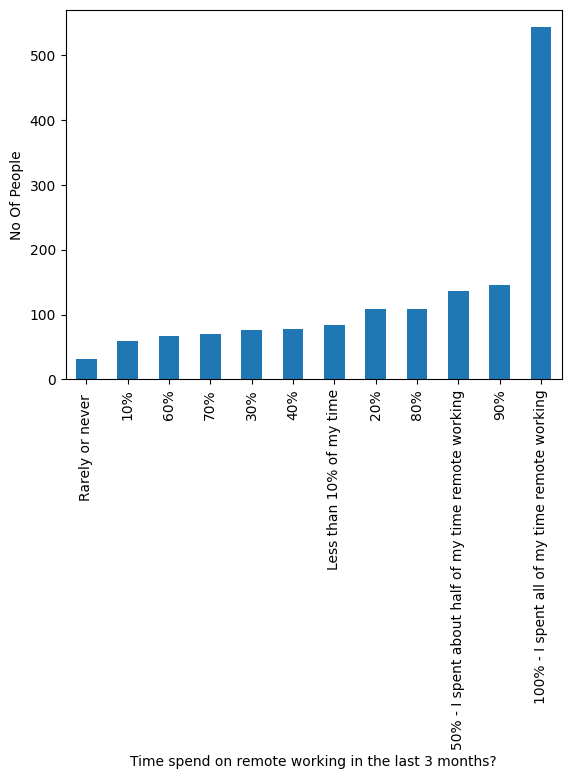

In [ ]:
#  Plotting distribution of time spent remote working
df_2020['Thinking about your current job, how much of your time did you spend remote working in the last 3 months?'].value_counts().sort_values().plot(kind='bar', ylabel='No Of People',xlabel='Time spend on remote working in the last 3 months?')




[Text(0, 0, '0%-1%'),
 Text(1, 0, '10%'),
 Text(2, 0, '60%'),
 Text(3, 0, '70%'),
 Text(4, 0, '30%'),
 Text(5, 0, '40%'),
 Text(6, 0, '1%-10%'),
 Text(7, 0, '20%'),
 Text(8, 0, '80%'),
 Text(9, 0, '50%'),
 Text(10, 0, '90%'),
 Text(11, 0, '100%')]

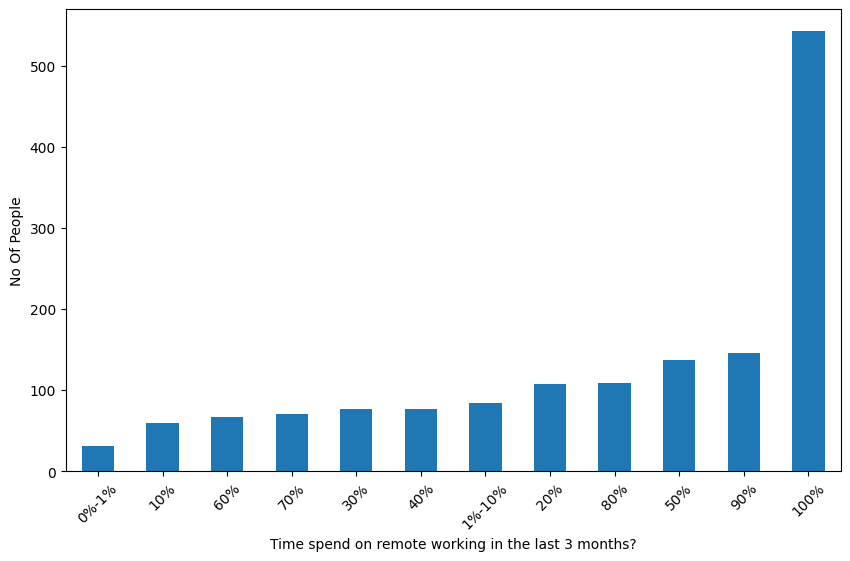

In [ ]:
b=['0%-1%','10%','60%','70%','30%','40%','1%-10%','20%','80%','50%','90%','100%']
df_2020['Thinking about your current job, how much of your time did you spend remote working in the last 3 months?'].value_counts().sort_values().plot(kind='bar', ylabel='No Of People',xlabel='Time spend on remote working in the last 3 months?',figsize=(10,6)).set_xticklabels([b[i] for i in range(0,12)], rotation=45)


<Axes: xlabel='Would you prefer to work remotely?', ylabel='No Of People'>

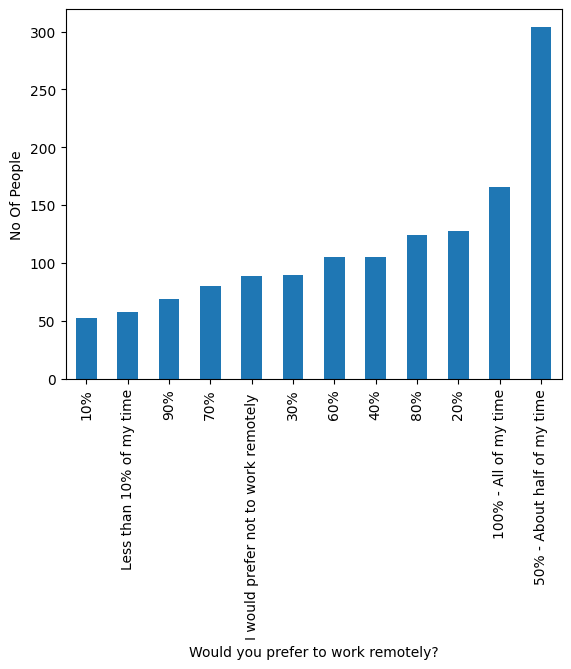

In [ ]:
# Plotting distribution of preferences for time spent remote working in the future
df_2020['Imagine that COVID-19 is cured or eradicated. Going forward, how much of your time would you prefer to work remotely?'].value_counts().sort_values().plot(kind='bar',ylabel='No Of People',xlabel='Would you prefer to work remotely?')



[Text(0, 0, '10%'),
 Text(1, 0, 'Less than 10%'),
 Text(2, 0, '90%'),
 Text(3, 0, '70%'),
 Text(4, 0, 'prefer not to work'),
 Text(5, 0, '30%'),
 Text(6, 0, '60%'),
 Text(7, 0, '40%'),
 Text(8, 0, '80%'),
 Text(9, 0, '20%'),
 Text(10, 0, '100%'),
 Text(11, 0, '50%')]

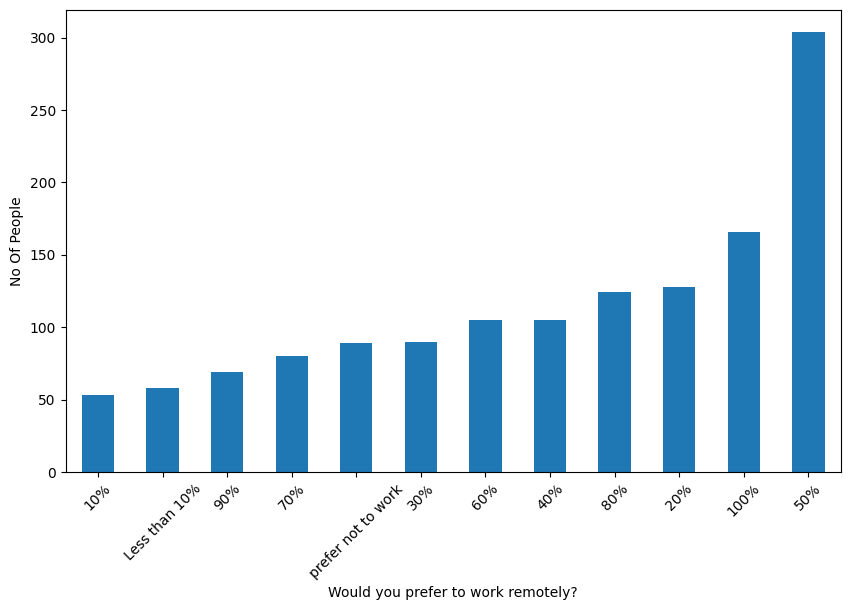

In [ ]:
c=['10%','Less than 10%','90%','70%','prefer not to work','30%','60%','40%','80%','20%','100%','50%']
df_2020['Imagine that COVID-19 is cured or eradicated. Going forward, how much of your time would you prefer to work remotely?'].value_counts().sort_values().plot(kind='bar',ylabel='No Of People',xlabel='Would you prefer to work remotely?',figsize=(10,6)).set_xticklabels([c[i] for i in range(0,12)], rotation=45)


<Axes: xlabel='Would you prefer to work remotely?', ylabel='No Of People'>

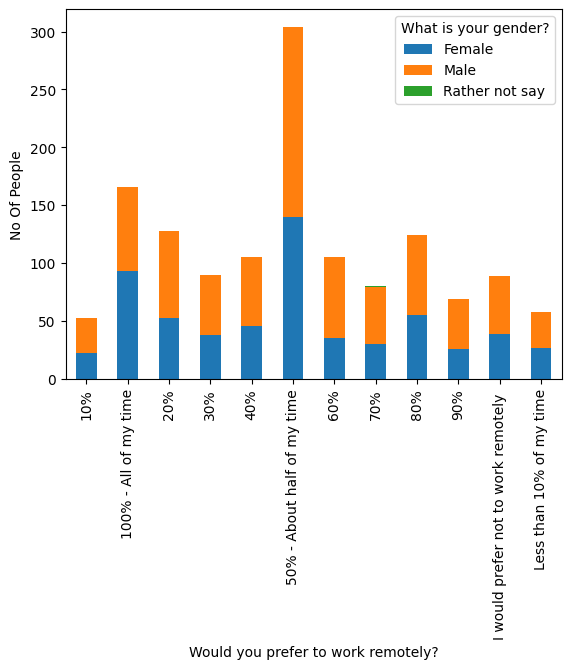

In [ ]:
# Plotting preferences for remote work by gender
df_2020.groupby(['Imagine that COVID-19 is cured or eradicated. Going forward, how much of your time would you prefer to work remotely?','What is your gender?']).size().unstack().plot(kind='bar', stacked=True, ylabel='No Of People',xlabel='Would you prefer to work remotely?')



[Text(0, 0, '10%'),
 Text(1, 0, '100%'),
 Text(2, 0, '20%'),
 Text(3, 0, '30%'),
 Text(4, 0, '40%'),
 Text(5, 0, '50%'),
 Text(6, 0, '60%'),
 Text(7, 0, '70%'),
 Text(8, 0, '80%'),
 Text(9, 0, '90%'),
 Text(10, 0, 'prefer not to work'),
 Text(11, 0, 'Less than 10%')]

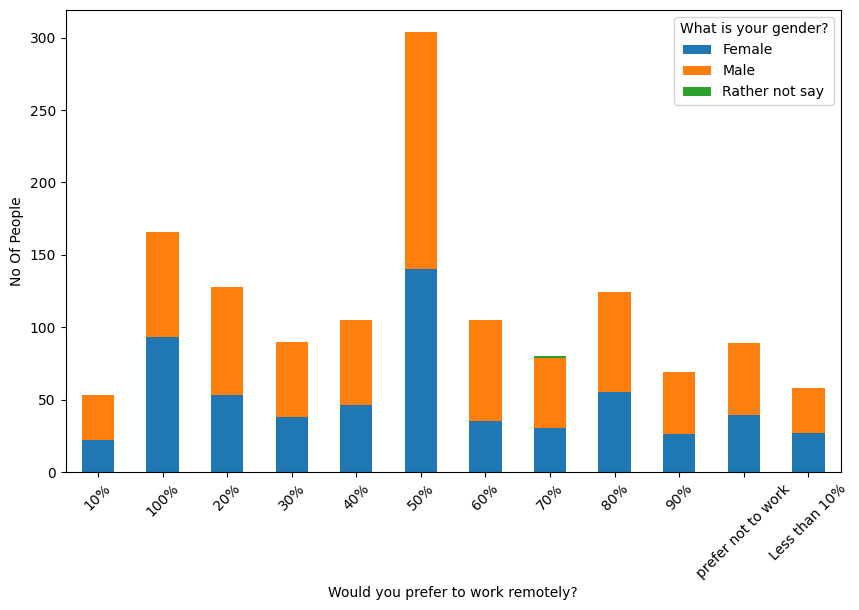

In [ ]:
c=['10%','100%','20%','30%','40%','50%','60%','70%','80%','90%','prefer not to work','Less than 10%']
df_2020.groupby(['Imagine that COVID-19 is cured or eradicated. Going forward, how much of your time would you prefer to work remotely?','What is your gender?']).size().unstack().plot(kind='bar', stacked=True, ylabel='No Of People',xlabel='Would you prefer to work remotely?',figsize=(10,6)).set_xticklabels([c[i] for i in range(0,12)], rotation=45)

<Axes: xlabel='Imagine that COVID-19 is cured or eradicated. Going forward, how much of your time would you prefer to work remotely?', ylabel='No Of People'>

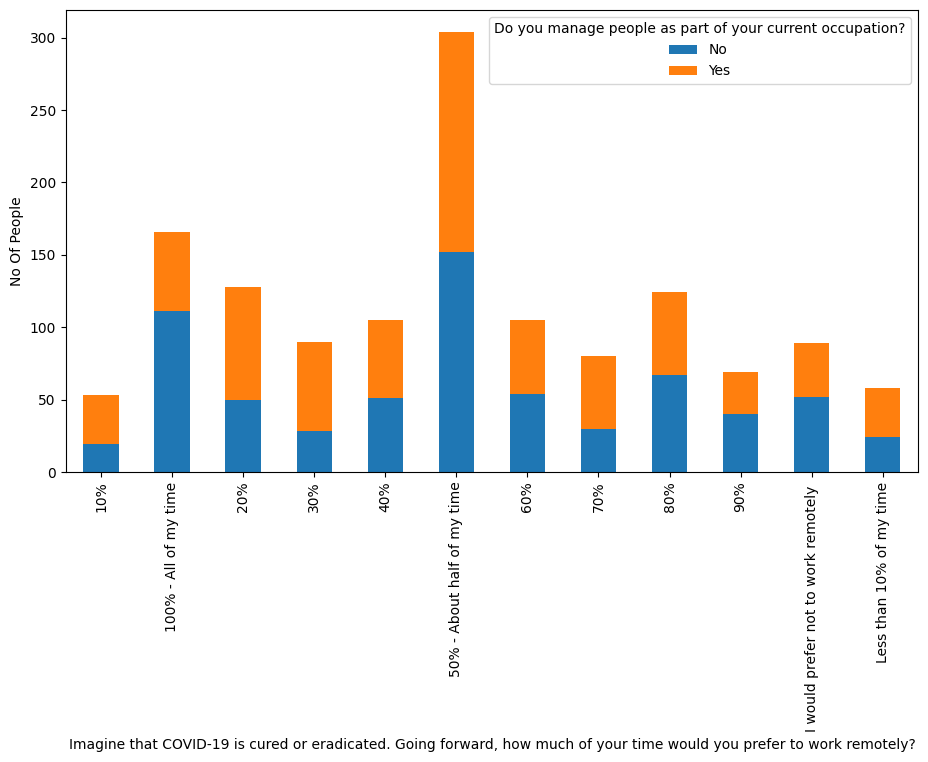

In [ ]:
#Plotting preferences for remote work by management responsibilities
df_2020.groupby(['Imagine that COVID-19 is cured or eradicated. Going forward, how much of your time would you prefer to work remotely?','Do you manage people as part of your current occupation?']).size().unstack().plot(kind='bar', stacked=True, figsize=(11, 6), ylabel='No Of People')




[Text(0, 0, '10%'),
 Text(1, 0, '100%'),
 Text(2, 0, '20%'),
 Text(3, 0, '30%'),
 Text(4, 0, '40%'),
 Text(5, 0, '50%'),
 Text(6, 0, '60%'),
 Text(7, 0, '70%'),
 Text(8, 0, '80%'),
 Text(9, 0, '90%'),
 Text(10, 0, 'prefer not to work'),
 Text(11, 0, 'Less than 10%')]

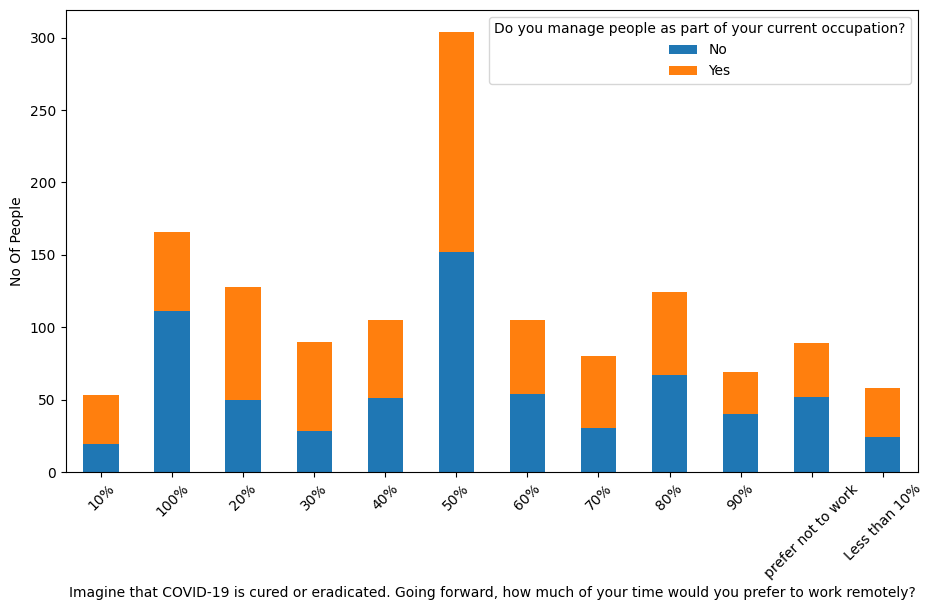

In [ ]:
c=['10%','100%','20%','30%','40%','50%','60%','70%','80%','90%','prefer not to work','Less than 10%']
df_2020.groupby(['Imagine that COVID-19 is cured or eradicated. Going forward, how much of your time would you prefer to work remotely?','Do you manage people as part of your current occupation?']).size().unstack().plot(kind='bar', stacked=True, figsize=(11, 6), ylabel='No Of People').set_xticklabels([c[i] for i in range(0,12)], rotation=45)


<Axes: xlabel='Productivity', ylabel='No Of People'>

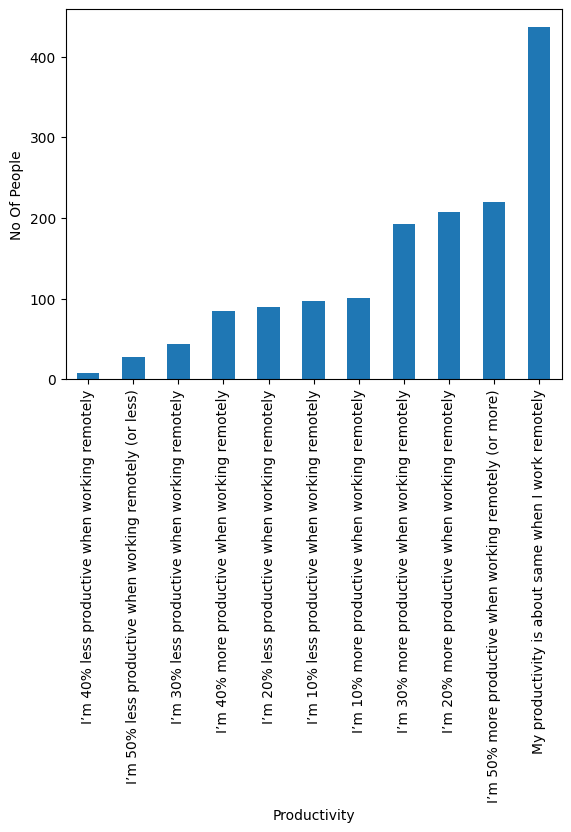

In [ ]:
#Plotting productivity comparison - remote vs in-person
df_2020['This question is about your productivity. Productivity means what you produce for each hour that you work. It includes the amount of work you achieve each hour, and the quality of your work each hour.  \nPlease compare your productivity when you work remotely to when you work at your employer’s workplace.  \nRoughly how productive are you, each hour, when you work remotely?'].value_counts().sort_values().plot(kind='bar', ylabel='No Of People',xlabel='Productivity')




[Text(0, 0, '40% Less'),
 Text(1, 0, '5o% Less'),
 Text(2, 0, '30% Less'),
 Text(3, 0, '40% More'),
 Text(4, 0, '20% Less'),
 Text(5, 0, '10% Less'),
 Text(6, 0, '10% More'),
 Text(7, 0, '30% More'),
 Text(8, 0, '20% More'),
 Text(9, 0, '50% More'),
 Text(10, 0, 'same')]

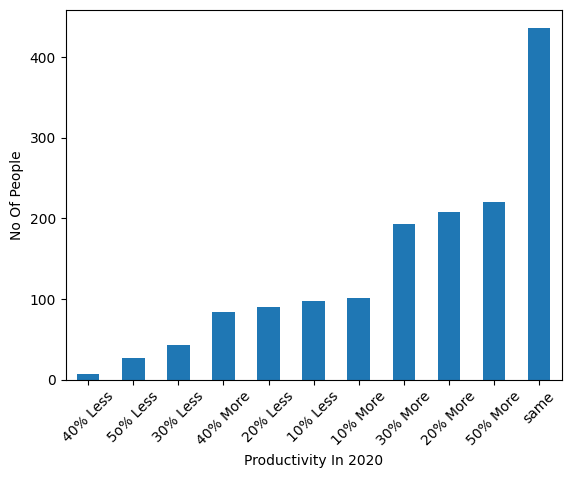

In [ ]:
a=['40% Less','5o% Less','30% Less','40% More','20% Less','10% Less','10% More','30% More','20% More','50% More','same']
df_2020['This question is about your productivity. Productivity means what you produce for each hour that you work. It includes the amount of work you achieve each hour, and the quality of your work each hour.  \nPlease compare your productivity when you work remotely to when you work at your employer’s workplace.  \nRoughly how productive are you, each hour, when you work remotely?'].value_counts().sort_values().plot(kind='bar', ylabel='No Of People',xlabel='Productivity In 2020').set_xticklabels([a[i] for i in range(0,11)], rotation=45)


In [ ]:
# Read 2020 survey data
df_2021 = pd.read_csv('/content/sample_data/2021_rws.csv',encoding='cp1252')
df_2021


,Response ID,What year were you born?,What is your gender?,"How long have you been in your current job? If you have more than one job, please answer all questions for your main job.",Which of the following best describes your industry?,Which of the following best describes your current occupation?,How many people are currently employed by your organisation?,Which of the following best describes your household?,Metro or Regional,"Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year? This means October-December 2020 If you work a 5 day week, each day of remote working equals 20% of your time.",...,How strongly do you agree or disagree with the following statements? - Offering remote work helps me retain employees,How strongly do you agree or disagree with the following statements? - Offering remote work helps me to recruit employees,How strongly do you agree or disagree with the following statements? - My team works well together when they work remotely,How strongly do you agree or disagree with the following statements? - I find it easy to manage employees remotely (e.g. tasking and monitoring progress),How strongly do you agree or disagree with the following statements? - I find it easy to manage poor performers remotely,How strongly do you agree or disagree with the following statements? - I feel well-prepared to manage employees remotely,How strongly do you agree or disagree with the following statements? - Managing people remotely makes me more focused on results,How strongly do you agree or disagree with the following statements? - I find it easy to contact my employees when they work remotely,"This question is about your productivity. Productivity means what you produce for each hour that you work. It includes the amount of work you achieve each hour, and the quality of your work each hour. Please compare your productivity when you work remotely to when you work at your employer’s workplace. Roughly how productive are you, each hour, when you work remotely?","Now think about the productivity of the employees you manage. Roughly how productive are the employees you manage, each hour, when they work remotely?"
0,1,1976,Male,More than 5 years,Other Services,Professionals - ICT Professionals,More than 200,Couple with dependent children,Metro,50% - I spent about half of my time remote wor...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I’m 50% more productive when working remotely ...,NaN
1,2,1971,Male,More than 5 years,Construction,Professionals - ICT Professionals,More than 200,Couple with no dependent children,Metro,10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I’m 50% more productive when working remotely ...,NaN
2,3,1978,Female,Between 6 and 12 months,Financial and Insurance,"Professionals - Business, Human Resource and M...",More than 200,Single person,Metro,100% - I spent all of my time remote working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,My productivity is about same when I work remo...,NaN
3,4,1962,Female,Between 1 and 5 years,Health Care and Social Assistance,Professionals - Health Professionals,Between 20 and 199,One parent family with dependent children,Regional,40%,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,I’m 50% more productive when working remotely ...,I’m 50% more productive when working remotely ...
4,5,1974,Male,More than 5 years,Financial and Insurance,Managers - Specialist Managers,More than 200,Couple with dependent children,Regional,100% - I spent all of my time remote working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I’m 20% more productive when working remotely,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1508,1995,Male,Between 1 and 5 years,Wholesale Trade,"Managers - Chief Executives, General Managers ...",Between 5 and 19,Coup

In [ ]:
df_2021.shape

(1512, 109)

In [ ]:
df_2021.columns

Index(['Response ID', 'What year were you born?  ', 'What is your gender?  ',
       'How long have you been in your current job?  If you have more than one job, please answer all questions for your main job.  ',
       'Which of the following best describes your industry?  ',
       'Which of the following best describes your current occupation?  ',
       'How many people are currently employed by your organisation?   ',
       'Which of the following best describes your household?  ',
       'Metro or Regional',
       'Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.  ',
       ...
       'How strongly do you agree or disagree with the following statements?    - Offering remote work helps me retain employees',
       'How strongly do you agree or disagree with the following statements?    - Offe

In [ ]:
df_2021.dtypes.value_counts()

object     96
float64    11
int64       2
Name: count, dtype: int64

In [ ]:
df_2021.describe()

,Response ID,What year were you born?,"Think about your experience this year. On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Preparing for work and commuting","Think about your experience this year. On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Working","Think about your experience this year. On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Caring and domestic responsibilities","Think about your experience this year. On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Personal and family time","Think about your experience this year. On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Sleep","Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Preparing for work and commuting","Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Working","Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Caring and domestic responsibilities","Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Personal and family time","Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Sleep",What is the biggest pay cut you would accept? Please give your answer as a percentage.
count,1512.000000,1512.000000,1509.000000,1509.000000,1495.000000,1507.000000,1500.000000,1488.000000,1509.000000,1494.000000,1505.000000,1503.000000,485.00000
mean,756.500000,1979.226190,2.245772,7.831875,2.797124,3.854672,7.393367,1.178192,8.110471,3.026171,4.335402,7.484930,0.19099
std,436.621117,11.836707,1.643633,1.931000,1.626177,1.765716,1.547390,1.949860,2.098393,1.573106,1.908772,1.567494,0.21682
min,1.000000,1957.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01000
25%,378.750000,1970.000000,1.000000,7.000000,2.000000,3.000000,7.000000,0.000000,7.000000,2.000000,3.000000,7.000000,0.05000
50%,756.500000,1980.000000,2.000000,8.000000,3.000000,4.000000,8.000000,0.500000,8.000000,3.000000,4.000000,8.000000,0.10000
75%,1134.250000,1989.000000,3.000000,8.500000,4.000000,5.000000,8.000000,1.000000,9.000000,4.000000,5.000000,8.000000,0.20000
max,1512.000000,2002.000

In [ ]:
df_2021.duplicated().sum()

0

In [ ]:
# Check for null values in each column
for column in df_2021.columns:
    print(f"Column {column} has {df_2021[column].isnull().sum()} null values")

Column Response ID has 0 null values
Column What year were you born?   has 0 null values
Column What is your gender?   has 0 null values
Column How long have you been in your current job?  If you have more than one job, please answer all questions for your main job.   has 0 null values
Column Which of the following best describes your industry?   has 0 null values
Column Which of the following best describes your current occupation?   has 0 null values
Column How many people are currently employed by your organisation?    has 0 null values
Column Which of the following best describes your household?   has 0 null values
Column Metro or Regional has 0 null values
Column Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.   has 0 null values
Column How much of your work time would you have preferred to wo

In [ ]:
# Examining gender
df_2021['What is your gender?  '].value_counts()

What is your gender?  
Female                    785
Male                      723
I would rather not say      3
Other                       1
Name: count, dtype: int64

In [ ]:
# Examining most common industry types
df_2021['Which of the following best describes your industry?  '].value_counts()

Which of the following best describes your industry?  
Financial and Insurance                     204
Professional, Scientific and Technical      163
Education and Training                      150
Information Media and Telecommunications    149
Other Services                              132
Health Care and Social Assistance           116
Retail Trade                                 86
Construction                                 71
Administrative and Support                   70
Manufacturing                                67
Public Administration and Safety             66
Wholesale Trade                              50
Transport, Postal and Warehousing            47
Arts and Recreation                          35
Electricity, Gas, Water and Waste            28
Accommodation and Food                       27
Rental, Hiring and Real Estate               22
Mining                                       15
Agriculture, Forestry and Fishing            14
Name: count, dtype: int64

<Axes: xlabel='How much time did you spend in quarter of months 5 days in week to achive 20% work time of the total work', ylabel='No Of People'>

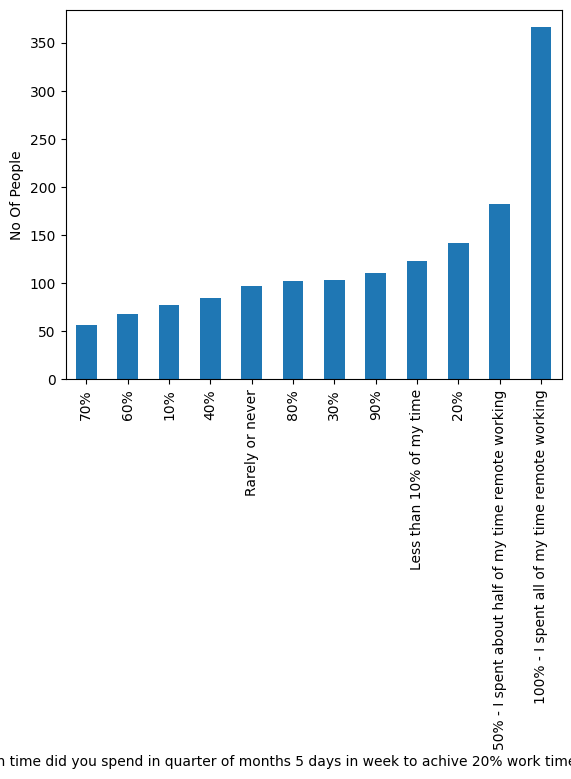

In [ ]:
# Plotting distribution of time spent remote working
df_2021['Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.  '].value_counts().sort_values().plot(kind='bar', ylabel='No Of People',xlabel='How much time did you spend in quarter of months 5 days in week to achive 20% work time of the total work')


[Text(0, 0, '70%'),
 Text(1, 0, '60%'),
 Text(2, 0, '10%'),
 Text(3, 0, '40%'),
 Text(4, 0, 'Rarely or never'),
 Text(5, 0, '80%'),
 Text(6, 0, '30%'),
 Text(7, 0, '90%'),
 Text(8, 0, 'Less than 10%'),
 Text(9, 0, '20%'),
 Text(10, 0, '50%'),
 Text(11, 0, '100%')]

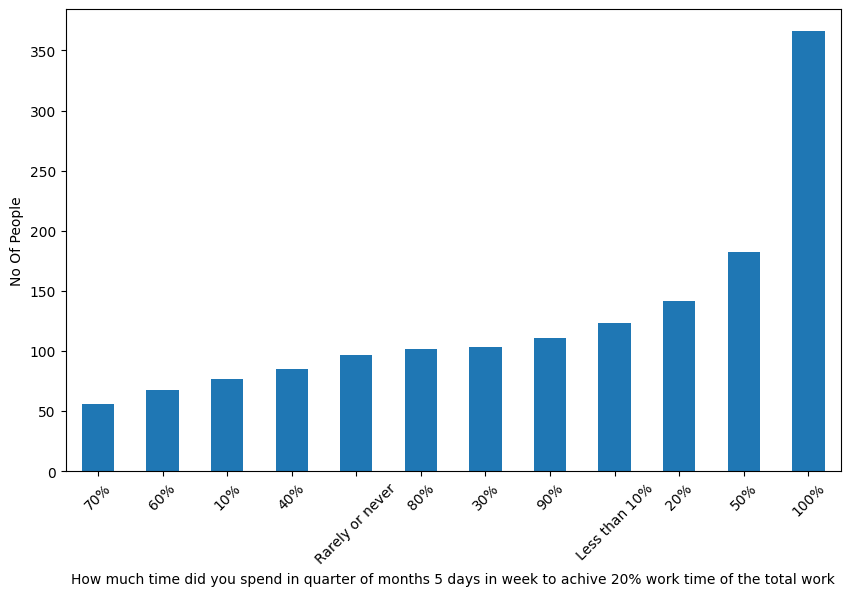

In [ ]:

c=['70%','60%','10%','40%','Rarely or never','80%','30%','90%','Less than 10%','20%','50%','100%']
df_2021['Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.  '].value_counts().sort_values().plot(kind='bar', ylabel='No Of People',xlabel='How much time did you spend in quarter of months 5 days in week to achive 20% work time of the total work',figsize=(10,6)).set_xticklabels([c[i] for i in range(0,12)], rotation=45)

<Axes: xlabel='How much of your work time would you prefer to work remotely?each day of remote working equals 20% of your time.', ylabel='No Of People'>

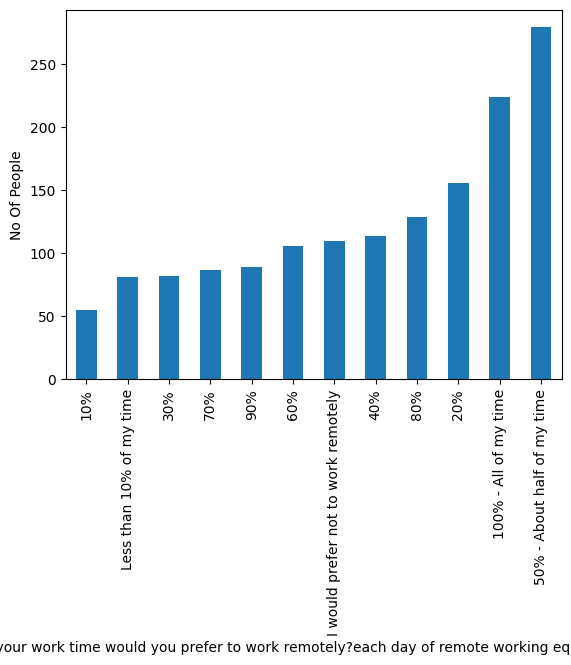

In [ ]:
# Plotting distribution of preferences for time spent remote working in the future
df_2021['Imagine that COVID-19 is cured or eradicated.   Going forward, how much of your work time would you prefer to work remotely?  If you work a 5 day week, each day of remote working equals 20% of your time.  '].value_counts().sort_values().plot(kind='bar', ylabel='No Of People',xlabel='How much of your work time would you prefer to work remotely?each day of remote working equals 20% of your time.')


[Text(0, 0, '10%'),
 Text(1, 0, 'Less than 10%'),
 Text(2, 0, '30%'),
 Text(3, 0, '70%'),
 Text(4, 0, '90%'),
 Text(5, 0, '60%'),
 Text(6, 0, 'prefer not to work'),
 Text(7, 0, '40%'),
 Text(8, 0, '80%'),
 Text(9, 0, '20%'),
 Text(10, 0, '100%'),
 Text(11, 0, '50%')]

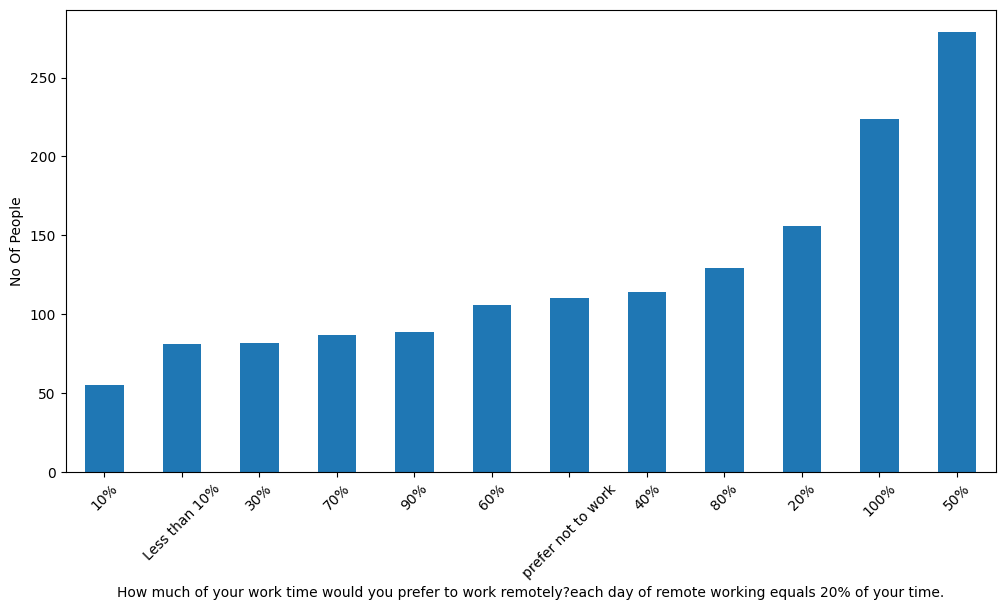

In [ ]:
c=['10%','Less than 10%','30%','70%','90%','60%','prefer not to work','40%','80%','20%','100%','50%']
df_2021['Imagine that COVID-19 is cured or eradicated.   Going forward, how much of your work time would you prefer to work remotely?  If you work a 5 day week, each day of remote working equals 20% of your time.  '].value_counts().sort_values().plot(kind='bar', ylabel='No Of People',xlabel='How much of your work time would you prefer to work remotely?each day of remote working equals 20% of your time.',figsize=(12,6)).set_xticklabels([c[i] for i in range(0,12)], rotation=45)

<Axes: xlabel='How much of your work time would you prefer to work remotely?each day of remote working equals 20% of your time.', ylabel='No Of People'>

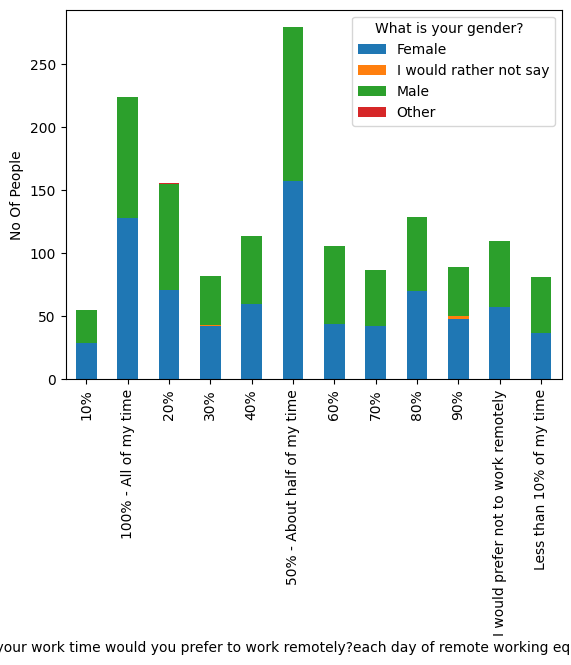

In [ ]:
#Plotting preferences for remote work by gender
df_2021.groupby(['Imagine that COVID-19 is cured or eradicated.   Going forward, how much of your work time would you prefer to work remotely?  If you work a 5 day week, each day of remote working equals 20% of your time.  ','What is your gender?  ']).size().unstack().plot(kind='bar', stacked=True, ylabel='No Of People',xlabel='How much of your work time would you prefer to work remotely?each day of remote working equals 20% of your time.')


[Text(0, 0, '10%'),
 Text(1, 0, '100%'),
 Text(2, 0, '20%'),
 Text(3, 0, '30%'),
 Text(4, 0, '40%'),
 Text(5, 0, '50%'),
 Text(6, 0, '60%'),
 Text(7, 0, '70%'),
 Text(8, 0, '80%'),
 Text(9, 0, '90%'),
 Text(10, 0, 'prefer not to work'),
 Text(11, 0, 'Less than 10%')]

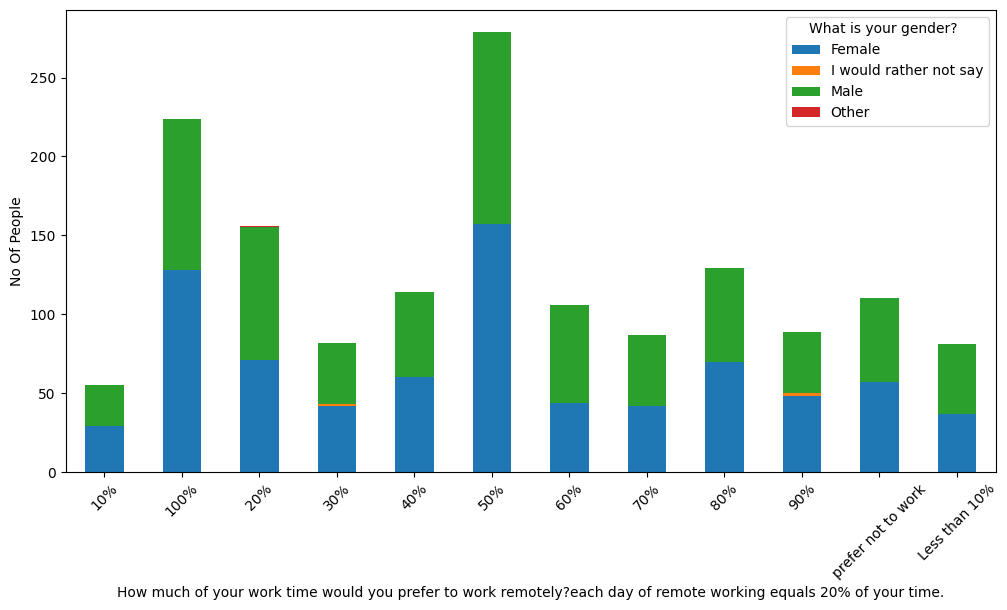

In [ ]:
c=['10%','100%','20%','30%','40%','50%','60%','70%','80%','90%','prefer not to work','Less than 10%']
df_2021.groupby(['Imagine that COVID-19 is cured or eradicated.   Going forward, how much of your work time would you prefer to work remotely?  If you work a 5 day week, each day of remote working equals 20% of your time.  ','What is your gender?  ']).size().unstack().plot(kind='bar', stacked=True, ylabel='No Of People',xlabel='How much of your work time would you prefer to work remotely?each day of remote working equals 20% of your time.',figsize=(12,6)).set_xticklabels([c[i] for i in range(0,12)], rotation=45)

<Axes: xlabel='How much of your work time would you prefer to work remotely?each day of remote working equals 20% of your time.', ylabel='No Of People'>

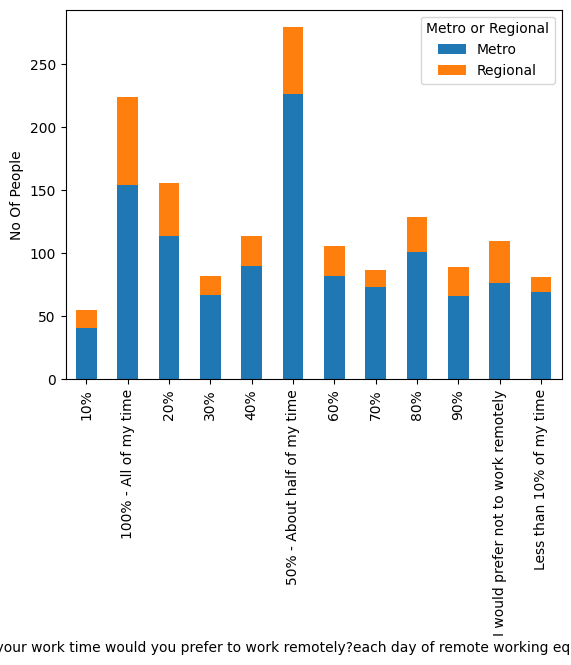

In [ ]:
#Plotting preferences for remote work by geographic region
df_2021.groupby(['Imagine that COVID-19 is cured or eradicated.   Going forward, how much of your work time would you prefer to work remotely?  If you work a 5 day week, each day of remote working equals 20% of your time.  ','Metro or Regional']).size().unstack().plot(kind='bar',stacked=True,  ylabel='No Of People',xlabel='How much of your work time would you prefer to work remotely?each day of remote working equals 20% of your time.')



[Text(0, 0, '40% Less'),
 Text(1, 0, '5o% Less'),
 Text(2, 0, '30% Less'),
 Text(3, 0, '40% More'),
 Text(4, 0, '20% Less'),
 Text(5, 0, '10% Less'),
 Text(6, 0, '10% More'),
 Text(7, 0, '30% More'),
 Text(8, 0, '20% More'),
 Text(9, 0, '50% More'),
 Text(10, 0, 'same')]

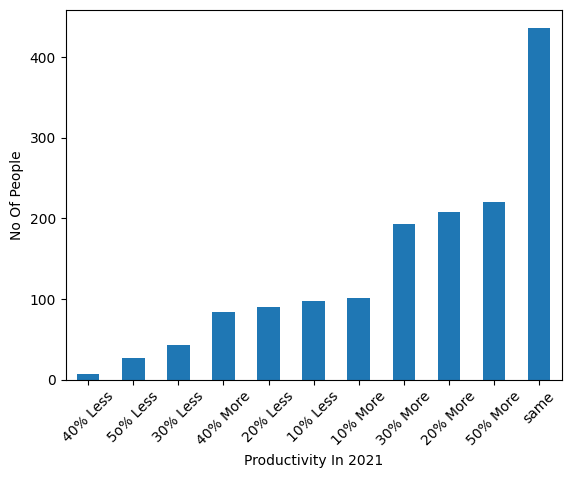

In [ ]:
#Plotting productivity comparison - remote vs in-person
# df_2020['This question is about your productivity. Productivity means what you produce for each hour that you work. It includes the amount of work you achieve each hour, and the quality of your work each hour.  \nPlease compare your productivity when you work remotely to when you work at your employer’s workplace.  \nRoughly how productive are you, each hour, when you work remotely?'].value_counts().sort_values().plot(kind='bar',ylabel='No Of People', xlabel='how productive are you, each hour, when you work remotely?', )
a=['40% Less','5o% Less','30% Less','40% More','20% Less','10% Less','10% More','30% More','20% More','50% More','same']
df_2020['This question is about your productivity. Productivity means what you produce for each hour that you work. It includes the amount of work you achieve each hour, and the quality of your work each hour.  \nPlease compare your productivity when you work remotely to when you work at your employer’s workplace.  \nRoughly how productive are you, each hour, when you work remotely?'].value_counts().sort_values().plot(kind='bar',ylabel='No Of People', xlabel='Productivity In 2021').set_xticklabels([a[i] for i in range(0,11)], rotation=45)



In [ ]:
common_cols = ['response id',
                'birth year',
                'gender',
                'years at job',
                'industry desc',
                'occupation desc',
                'organization size',
                'household',
                'metro or regional',
                'rw percentage (2020)',
                'preferred rw percentage (2020)',
                'preferred rw percentage (future)',
                'org encouraged rw?',
                'org prepared for rw?',
                'rw is common at org?',
                'rw permission is attainable',
                'rw collaboration easy?',
                'if no covid: employer encourage rw ',
                'if no covid: employer support rw',
                'if no covid: i would have choice about rw',
                'in-person: hours  commuting ',
                'in-person: hours  working',
                'in-person: hours domestic responsibilities',
                'in-person: hours  personal/family time',
                'remote: hours commuting ',
                'remote: hours working',
                'remote: hours domestic responsibilities',
                'remote: hours personal/family time',
                'manage others?',
                'productivity (remote vs office)']

In [ ]:
df_2020.columns

Index(['Response ID', 'What year were you born?', 'What is your gender?',
       'Which of the following best describes your industry?',
       'Which of the following best describes your industry? (Detailed)',
       'Which of the following best describes your current occupation?',
       'Which of the following best describes your current occupation? (Detailed)',
       'How many people are currently employed by your organisation?',
       'Do you manage people as part of your current occupation?',
       'Which of the following best describes your household?',
       'How long have you been in your current job?', 'Metro / Regional',
       'Thinking about your current job, how much of your time did you spend remote working last year?',
       'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely',
       'Thinking about remote working last year, how strongly do you agree or 

In [ ]:
df_2020.columns = ['response id',
'birth year',
'gender',
'industry desc',
'industry desc (detailed)',
'occupation desc',
'occupation desc (detailed)',
'organization size',
'manage others?',
'household',
'years at job',
'metro or regional',
'rw percentage (pre-covid)',
'org encouraged rw? (pre-covid)',
'org prepared for rw? (pre-covid)',
'org rw common? (pre-covid)',
'rw permission is attainable (pre-covid)',
'rw collaboration easy? (pre-covid)',
'recommend remote work? (pre-covid)',
'preferred rw percentage (pre-covid)',
'rw percentage (2020)',
'org encouraged rw?',
'org prepared for rw?',
'rw is common at org?',
'rw permission is attainable',
'rw collaboration easy?',
'rw recommendation (2020)',
'preferred rw percentage (2020)',
'preferred rw percentage (future)',
'if no covid: employer encourage rw ',
'if no covid: employer support rw',
'if no covid: i would have choice about rw',
'productivity (remote vs office)',
'in-person: hours  commuting ',
'in-person: hours  working',
'in-person: hours  personal/family time',
'in-person: hours domestic responsibilities',
'remote: hours commuting ',
'remote: hours working',
'remote: hours personal/family time',
'remote: hours domestic responsibilities']

In [ ]:
df_2021.columns=['response id',
'birth year',
'gender',
'years at job',
'industry desc',
'occupation desc',
'organization size',
'household',
'metro or regional',
'rw percentage (2020)',
'preferred rw percentage (2020)',
'rw percentage (2021)',
'preferred rw percentage (2021)',
'preferred rw percentage (future)',
'rw policy changes?',
'hybrid? (2021)',
'hybrid percentage (2021)',
'preferred hybrid percentage (2021)',
'any in-person work required?',
'in-person work percentage required',
'my employer remote working policy suits me',
'i choose how much work i do remotely',
' i choose which days i work remotely',
'manager chooses remote workload',
'rw policy attitude',
'org encouraged rw?',
'org prepared for rw?',
'rw is common at org?',
'rw permission is attainable',
'rw collaboration easy?',
'rw reduce promotion?',
'i take breaks when rw',
'rw positive for employer?',
'who supports rw?',
'if no covid: employer encourage rw ',
'if no covid: employer support rw',
'if no covid: i would have choice about rw',
'in-person: hours  commuting ',
'in-person: hours  working',
'in-person: hours domestic responsibilities',
'in-person: hours  personal/family time',
'in-person: hours sleeping',
'remote: hours commuting ',
'remote: hours working',
'remote: hours domestic responsibilities',
'remote: hours personal/family time',
'remote: hours  sleeping',
'pay cut for rw?',
'acceptable pay cut ',
'improvement - caring responsibilities',
'improvement - connectivity',
'improvement - software and systems',
'improvement - collaboration difficulty',
'improvement - poor management',
'improvement - it equipment',
'improvement - isolation feelings',
'improvement - extra costs',
'improvement - cyber security',
'improvement - tasks not suited for remote',
'improvement - my workspace',
'improvement - motivation',
'improvement - management discourages remote working',
'improvement - living situation',
'improvement - rw skills',
'improvement - health/safety',
'big barriers 1',
'small barriers 1',
'big barriers 2',
'small barriers 2',
'big barriers 3',
'small barriers 3',
'big barriers 4',
'small barriers 4',
'big barriers 5',
'small barriers 5',
'big barriers 6',
'small barriers 6',
'big barriers 7',
'small barriers 7',
'big barriers 8',
'small barriers 8',
'big barriers 9',
'small barriers 9',
'big barriers 10',
'small barriers 10',
'big barriers 11',
'small barriers 11',
'big barriers 12',
'small barriers 12',
'big barriers 13',
'small barriers 13',
'big barriers 14',
'small barriers 14',
'feel better when rw?',
'more active when rw?',
'feel better with colleagues ip?',
'manage others?',
'employee rw?',
'i choose rw for employees',
'rw helps retention',
'rw helps recruiting',
'team collaboration',
'management is easy',
'managing poor performers is easy',
'rw management preparation',
'results focused manager when rw',
'employees responsive when rw',
'productivity (remote vs office)',
'employee productivity (remote vs office)']

In [ ]:
common_cols = ['response id',
                'birth year',
                'gender',
                'years at job',
                'industry desc',
                'occupation desc',
                'organization size',
                'household',
                'metro or regional',
                'rw percentage (2020)',
                'preferred rw percentage (2020)',
                'preferred rw percentage (future)',
                'org encouraged rw?',
                'org prepared for rw?',
                'rw is common at org?',
                'rw permission is attainable',
                'rw collaboration easy?',
                'if no covid: employer encourage rw ',
                'if no covid: employer support rw',
                'if no covid: i would have choice about rw',
                'in-person: hours  commuting ',
                'in-person: hours  working',
                'in-person: hours domestic responsibilities',
                'in-person: hours  personal/family time',
                'remote: hours commuting ',
                'remote: hours working',
                'remote: hours domestic responsibilities',
                'remote: hours personal/family time',
                'manage others?',
                'productivity (remote vs office)']

In [ ]:
merged_df = pd.merge(df_2020, df_2021, on= common_cols , how='outer')

In [ ]:
merged_df = merged_df.loc[:, merged_df.columns.isin(common_cols)]
merged_df

,response id,birth year,gender,industry desc,occupation desc,organization size,manage others?,household,years at job,metro or regional,...,if no covid: i would have choice about rw,productivity (remote vs office),in-person: hours commuting,in-person: hours working,in-person: hours personal/family time,in-person: hours domestic responsibilities,remote: hours commuting,remote: hours working,remote: hours personal/family time,remote: hours domestic responsibilities
0,1,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,Strongly disagree,I’m 50% more productive when working remotely ...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,2,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,Somewhat agree,I’m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
2,3,1982,Male,"Electricity, Gas, Water and Waste Services",Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,...,Somewhat agree,I’m 10% less productive when working remotely,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0
3,4,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,...,Somewhat agree,My productivity is about same when I work remo...,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0
4,5,1991,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,...,Strongly disagree,I’m 20% more productive when working remotely,1.0,8.0,13.0,2.0,0.0,6.0,15.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,1508,1995,Male,Wholesale Trade,"Managers - Chief Executives, General Managers ...",Between 5 and 19,Yes,Couple with dependent children,Between 1 and 5 years,Metro,...,Somewhat likely,I’m 30% more productive when working remotely,2.0,8.0,3.0,4.0,3.0,8.0,3.0,3.0
3015,1509,1993,Female,Health Care and Social Assistance,Professionals - Health Professionals,Between 5 and 19,Yes,Multiple family household,More than 5 years,Metro,...,Very unlikely,My productivity is about same when I work remo...,3.0,10.0,2.0,2.0,1.0,8.0,4.0,3.0
3016,1510,1979,Female,Administrative and Support,Clerical and administrative workers - Clerical...,Between 20 and 199,No,One parent family with dependent children,More than 5 years,Regional,...,Very unlikely,My productivity is about same when I work remo...,3.0,7.0,2.0,4.0,1.0,7.0,4.0,4.0
3017,1511,1965,Female,Education and Training,"Managers - Chief Executives, General Managers ...",Between 1 and 4,Yes,Couple with no dependent children,More than 5 years,Metro,...,Somewhat likely,My productivity is about same when I work remo...,1.0,7.0,4.0,4.0,0.5,7.0,4.5,4.0


In [ ]:
for column in merged_df.columns:
    print(f"Column {column} has {merged_df[column].isnull().sum()} null values")

Column response id has 0 null values
Column birth year has 0 null values
Column gender has 0 null values
Column industry desc has 0 null values
Column occupation desc has 0 null values
Column organization size has 0 null values
Column manage others? has 136 null values
Column household has 0 null values
Column years at job has 0 null values
Column metro or regional has 0 null values
Column rw percentage (2020) has 0 null values
Column org encouraged rw? has 31 null values
Column org prepared for rw? has 31 null values
Column rw is common at org? has 31 null values
Column rw permission is attainable has 31 null values
Column rw collaboration easy? has 31 null values
Column preferred rw percentage (2020) has 0 null values
Column preferred rw percentage (future) has 136 null values
Column if no covid: employer encourage rw  has 0 null values
Column if no covid: employer support rw has 0 null values
Column if no covid: i would have choice about rw has 0 null values
Column productivity (rem

In [ ]:
merged_df.to_csv('merged_data.csv')

In [ ]:
merged_df = pd.read_csv('merged_data.csv',encoding='cp1252',index_col=0)
merged_df.head()


,response id,birth year,gender,industry desc,occupation desc,organization size,manage others?,household,years at job,metro or regional,...,if no covid: i would have choice about rw,productivity (remote vs office),in-person: hours commuting,in-person: hours working,in-person: hours personal/family time,in-person: hours domestic responsibilities,remote: hours commuting,remote: hours working,remote: hours personal/family time,remote: hours domestic responsibilities
0,1,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,Strongly disagree,Iâ€™m 50% more productive when working remotel...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,2,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,Somewhat agree,Iâ€™m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
2,3,1982,Male,"Electricity, Gas, Water and Waste Services",Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,...,Somewhat agree,Iâ€™m 10% less productive when working remotely,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0
3,4,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,...,Somewhat agree,My productivity is about same when I work remo...,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0
4,5,1991,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,...,Strongly disagree,Iâ€™m 20% more productive when working remotely,1.0,8.0,13.0,2.0,0.0,6.0,15.0,3.0


In [ ]:
merged_df = merged_df.drop(['response id'],axis=1)

In [ ]:
merged_df['responder_id'] = merged_df.index
merged_df.head()

,birth year,gender,industry desc,occupation desc,organization size,manage others?,household,years at job,metro or regional,rw percentage (2020),...,productivity (remote vs office),in-person: hours commuting,in-person: hours working,in-person: hours personal/family time,in-person: hours domestic responsibilities,remote: hours commuting,remote: hours working,remote: hours personal/family time,remote: hours domestic responsibilities,responder_id
0,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,90%,...,Iâ€™m 50% more productive when working remotel...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0,0
1,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,20%,...,Iâ€™m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0,1
2,1982,Male,"Electricity, Gas, Water and Waste Services",Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,50% - I spent about half of my time remote wor...,...,Iâ€™m 10% less productive when working remotely,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0,2
3,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,100% - I spent all of my time remote working,...,My productivity is about same when I work remo...,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0,3
4,1991,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,90%,...,Iâ€™m 20% more productive when working remotely,1.0,8.0,13.0,2.0,0.0,6.0,15.0,3.0,4


In [ ]:
# shift column 'responder_id' to first position
first_column = merged_df.pop('responder_id')

# insert column using insert(position,column_name,
# first_column) function
merged_df.insert(0, 'responder_id', first_column)

merged_df.head()

,responder_id,birth year,gender,industry desc,occupation desc,organization size,manage others?,household,years at job,metro or regional,...,if no covid: i would have choice about rw,productivity (remote vs office),in-person: hours commuting,in-person: hours working,in-person: hours personal/family time,in-person: hours domestic responsibilities,remote: hours commuting,remote: hours working,remote: hours personal/family time,remote: hours domestic responsibilities
0,0,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,Strongly disagree,Iâ€™m 50% more productive when working remotel...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,1,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,Somewhat agree,Iâ€™m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
2,2,1982,Male,"Electricity, Gas, Water and Waste Services",Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,...,Somewhat agree,Iâ€™m 10% less productive when working remotely,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0
3,3,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,...,Somewhat agree,My productivity is about same when I work remo...,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0
4,4,1991,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,...,Strongly disagree,Iâ€™m 20% more productive when working remotely,1.0,8.0,13.0,2.0,0.0,6.0,15.0,3.0


In [ ]:
# Convert spaces in column headers to underscores
merged_df.columns = merged_df.columns.str.replace(' ', '_')

# Remove right parentheses in column headers
merged_df.columns = merged_df.columns.str.replace(')', '')

# Remove left parentheses in column headers
merged_df.columns = merged_df.columns.str.replace('(', '')

# Removed Dashes in column headers
merged_df.columns = merged_df.columns.str.replace('-', '')

# Remove colon in column headers
merged_df.columns = merged_df.columns.str.replace(':', '')

# Convert slash in column headers to underscores
merged_df.columns = merged_df.columns.str.replace('/', '_')

# Remove question marks from column headers
merged_df.columns = merged_df.columns.str.replace('?', '')

# Remove underscore at the end of column names
merged_df = merged_df.rename(columns=
               {'inperson_hours__commuting_': 'inperson_hours__commuting',
                'remote_hours_commuting_': 'remote_hours_commuting',
                'if_no_covid_employer_encourage_rw_' : 'if_no_covid_employer_encourage_rw'})

In [ ]:
merged_df.head()

,responder_id,birth_year,gender,industry_desc,occupation_desc,organization_size,manage_others,household,years_at_job,metro_or_regional,...,if_no_covid_i_would_have_choice_about_rw,productivity_remote_vs_office,inperson_hours__commuting,inperson_hours__working,inperson_hours__personal_family_time,inperson_hours_domestic_responsibilities,remote_hours_commuting,remote_hours_working,remote_hours_personal_family_time,remote_hours_domestic_responsibilities
0,0,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,Strongly disagree,Iâ€™m 50% more productive when working remotel...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,1,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,Somewhat agree,Iâ€™m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
2,2,1982,Male,"Electricity, Gas, Water and Waste Services",Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,...,Somewhat agree,Iâ€™m 10% less productive when working remotely,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0
3,3,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,...,Somewhat agree,My productivity is about same when I work remo...,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0
4,4,1991,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,...,Strongly disagree,Iâ€™m 20% more productive when working remotely,1.0,8.0,13.0,2.0,0.0,6.0,15.0,3.0


In [ ]:
merged_df.duplicated().sum()

0

In [ ]:
# If a response to a question is left blank for categorical responses, replace it with "no response"
object_columns = ["manage_others",
                 "org_encouraged_rw",
                 "org_prepared_for_rw",
                 "rw_is_common_at_org",
                 "rw_permission_is_attainable",
                 "rw_collaboration_easy",
                 "preferred_rw_percentage_2020",
                 "preferred_rw_percentage_future"]
merged_df[object_columns] = merged_df[object_columns].fillna("No response")

In [ ]:
# See columns with float datatype
merged_df.select_dtypes(include=[np.float64]).columns

Index(['inperson_hours__commuting', 'inperson_hours__working',
       'inperson_hours__personal_family_time',
       'inperson_hours_domestic_responsibilities', 'remote_hours_commuting',
       'remote_hours_working', 'remote_hours_personal_family_time',
       'remote_hours_domestic_responsibilities'],
      dtype='object')

In [ ]:
# Check for null values in float columns
for column in merged_df.select_dtypes(include=[np.float64]).columns:
    print(f"Column {column} has {merged_df[column].isnull().sum()} null values")

Column inperson_hours__commuting has 3 null values
Column inperson_hours__working has 3 null values
Column inperson_hours__personal_family_time has 5 null values
Column inperson_hours_domestic_responsibilities has 17 null values
Column remote_hours_commuting has 24 null values
Column remote_hours_working has 3 null values
Column remote_hours_personal_family_time has 7 null values
Column remote_hours_domestic_responsibilities has 18 null values


In [ ]:
## Find the median value of each column with a float64 datatype.
for column in merged_df.select_dtypes(include=[np.float64]).columns:
    print(f"Column {column} has a median of {merged_df[column].median()}")

Column inperson_hours__commuting has a median of 2.0
Column inperson_hours__working has a median of 8.0
Column inperson_hours__personal_family_time has a median of 3.5
Column inperson_hours_domestic_responsibilities has a median of 2.0
Column remote_hours_commuting has a median of 0.5
Column remote_hours_working has a median of 8.0
Column remote_hours_personal_family_time has a median of 4.0
Column remote_hours_domestic_responsibilities has a median of 2.5


In [ ]:
# replace all null values with the column's median in merged_df
for column in merged_df.select_dtypes(include=[np.float64]).columns:
    merged_df[column] = merged_df[column].fillna(merged_df[column].median())

In [ ]:
# Check null values again to confirm they've been replaced for both object and float64 datatypes
for column in merged_df.columns:
    print(f"Column {column} has {merged_df[column].isnull().sum()} null values")

Column responder_id has 0 null values
Column birth_year has 0 null values
Column gender has 0 null values
Column industry_desc has 0 null values
Column occupation_desc has 0 null values
Column organization_size has 0 null values
Column manage_others has 0 null values
Column household has 0 null values
Column years_at_job has 0 null values
Column metro_or_regional has 0 null values
Column rw_percentage_2020 has 0 null values
Column org_encouraged_rw has 0 null values
Column org_prepared_for_rw has 0 null values
Column rw_is_common_at_org has 0 null values
Column rw_permission_is_attainable has 0 null values
Column rw_collaboration_easy has 0 null values
Column preferred_rw_percentage_2020 has 0 null values
Column preferred_rw_percentage_future has 0 null values
Column if_no_covid_employer_encourage_rw has 0 null values
Column if_no_covid_employer_support_rw has 0 null values
Column if_no_covid_i_would_have_choice_about_rw has 0 null values
Column productivity_remote_vs_office has 0 null

In [ ]:
# Generate our categorical variable list
merged_df_cat = merged_df.dtypes[merged_df.dtypes == "object"].index.tolist()

In [ ]:
# Check the number of unique values in each column
merged_df[merged_df_cat].nunique()

gender                                       5
industry_desc                               26
occupation_desc                             50
organization_size                            6
manage_others                                3
household                                    8
years_at_job                                 3
metro_or_regional                            2
rw_percentage_2020                          13
org_encouraged_rw                            6
org_prepared_for_rw                          6
rw_is_common_at_org                          6
rw_permission_is_attainable                  6
rw_collaboration_easy                        6
preferred_rw_percentage_2020                13
preferred_rw_percentage_future              14
if_no_covid_employer_encourage_rw           10
if_no_covid_employer_support_rw             10
if_no_covid_i_would_have_choice_about_rw    10
productivity_remote_vs_office               12
dtype: int64

In [ ]:
industry_counts = merged_df.industry_desc.value_counts()
industry_counts

industry_desc
Education and Training                             294
Information Media and Telecommunications           263
Professional, Scientific and Technical Services    259
Other Services                                     222
Health Care and Social Assistance                  219
Financial and Insurance                            204
Retail Trade                                       173
Financial and Insurance Services                   173
Professional, Scientific and Technical             163
Manufacturing                                      149
Public Administration and Safety                   147
Construction                                       127
Transport, Postal and Warehousing                  104
Wholesale Trade                                     94
Administrative and Support Services                 76
Administrative and Support                          70
Arts and Recreation Services                        38
Arts and Recreation                                

In [ ]:
# Determine which values to replace
replace_industries = list(industry_counts[industry_counts < 150].index)

# Replace in DataFrame
for industry in replace_industries:
    merged_df.industry_desc = merged_df.industry_desc.replace(industry,"Other")

# Check to make sure binning was successful
merged_df.industry_desc.value_counts()

industry_desc
Other                                              1049
Education and Training                              294
Information Media and Telecommunications            263
Professional, Scientific and Technical Services     259
Other Services                                      222
Health Care and Social Assistance                   219
Financial and Insurance                             204
Retail Trade                                        173
Financial and Insurance Services                    173
Professional, Scientific and Technical              163
Name: count, dtype: int64

In [ ]:
# Print the number of occupations in the occupation_desc column
occupation_counts = merged_df.occupation_desc.value_counts()
occupation_counts

occupation_desc
Professionals                                                                               580
Managers                                                                                    503
Managers - Specialist Managers                                                              240
Clerical and administrative                                                                 223
Managers - Chief Executives, General Managers and Legislators                               191
Professionals - Business, Human Resource and Marketing Professionals                        166
Professionals - ICT Professionals                                                           108
Professionals - Education Professionals                                                     103
Sales                                                                                        79
Professionals - Design, Engineering, Science and Transport Professionals                     76
Technicians and trades  

In [ ]:
# Determine which values to replace
replace_occupations = list(occupation_counts[occupation_counts < 75].index)

# Replace in DataFrame
for occupation in replace_occupations:
    merged_df.occupation_desc = merged_df.occupation_desc.replace(occupation,"Other")

# Check to make sure binning was successful
merged_df.occupation_desc.value_counts()

occupation_desc
Other                                                                       750
Professionals                                                               580
Managers                                                                    503
Managers - Specialist Managers                                              240
Clerical and administrative                                                 223
Managers - Chief Executives, General Managers and Legislators               191
Professionals - Business, Human Resource and Marketing Professionals        166
Professionals - ICT Professionals                                           108
Professionals - Education Professionals                                     103
Sales                                                                        79
Professionals - Design, Engineering, Science and Transport Professionals     76
Name: count, dtype: int64

In [ ]:
merged_df['rw_percentage_2020'].value_counts()

rw_percentage_2020
100% - I spent all of my time remote working          909
50% - I spent about half of my time remote working    319
90%                                                   257
20%                                                   250
80%                                                   211
Less than 10% of my time                              207
30%                                                   179
40%                                                   162
10%                                                   136
60%                                                   135
70%                                                   126
Rarely or never                                        97
Rarely or never                                        31
Name: count, dtype: int64

In [ ]:
## Convert rw_percentage_(2020) responses to the number of remote workdays per week

rw_percentage_2020_map = {'Less than 10% of my time':'0-1 days',
                          'Rarely or never':'0-1 days',
                          'Rarely or never ':'0-1 days',
                          '10%':'0-1 days',
                          '20%':'1-2 days',
                          '30%':'1-2 days',
                          '40%':'2-3 days',
                          '50% - I spent about half of my time remote working':'2-3 days',
                          '60%':'3-4 days',
                          '70%':'3-4 days',
                          '80%':'4-5 days',
                          '90%':'4-5 days',
                          '100% - I spent all of my time remote working':'4-5 days'}

merged_df['rw_percentage_2020']= merged_df['rw_percentage_2020'].map(rw_percentage_2020_map)

In [ ]:
# Confirm new response counts
merged_df['rw_percentage_2020'].value_counts()

rw_percentage_2020
4-5 days    1377
2-3 days     481
0-1 days     471
1-2 days     429
3-4 days     261
Name: count, dtype: int64

In [ ]:
preferred_rw_percentage_2020_map = {'Less than 10% of my time':'0-1 days',
                          'I would not have preferred to work remotely':'0-1 days',
                          'I would not have preferred to work remotely ':'0-1 days',
                          '10%':'0-1 days',
                          '20%':'1-2 days',
                          '30%':'1-2 days',
                          '40%':'2-3 days',
                          '50% - About half of my time':'2-3 days',
                          '60%':'3-4 days',
                          '70%':'3-4 days',
                          '80%':'4-5 days',
                          '90%':'4-5 days',
                          '100% - All of my time':'4-5 days',
                          'No response':'No response'}

merged_df['preferred_rw_percentage_2020']= merged_df['preferred_rw_percentage_2020'].map(preferred_rw_percentage_2020_map)

In [ ]:
preferred_rw_percentage_future_map = {'Less than 10% of my time':'0-1 days',
                          'I would prefer not to work remotely':'0-1 days',
                          'I would prefer not to work remotely ':'0-1 days',
                          '10%':'0-1 days',
                          '20%':'1-2 days',
                          '30%':'1-2 days',
                          '40%':'2-3 days',
                          '50% - About half of my time':'2-3 days',
                          '60%':'3-4 days',
                          '70%':'3-4 days',
                          '80%':'4-5 days',
                          '90%':'4-5 days',
                          '100% - All of my time':'4-5 days',
                          'No response':'No response'}

merged_df['preferred_rw_percentage_future']= merged_df['preferred_rw_percentage_future'].map(preferred_rw_percentage_future_map)

In [ ]:
productivity_remote_vs_office_map = {'Iâ€™m 50% more productive when working remotely (or more)':'much more productive',
                          'Iâ€™m 40% more productive when working remotely':'much more productive',
                          'Iâ€™m 30% more productive when working remotely':'much more productive',
                          'Iâ€™m 20% more productive when working remotely':'more productive',
                          'Iâ€™m 10% more productive when working remotely':'more productive',
                          'My productivity is about same when I work remotely':'same productivity',
                          'Iâ€™m 10% less productive when working remotely':'less productive',
                          'Iâ€™m 20% less productive when working remotely':'less productive',
                          'Iâ€™m 30% less productive when working remotely':'much less productive',
                          'Iâ€™m 40% less productive when working remotely':'much less productive',
                          'Iâ€™m 50% less productive when working remotely (or less)':'much less productive',
                          'Iâ€™m 50% less productive when working remotely (or worse)':'much less productive'}

merged_df['productivity_remote_vs_office']= merged_df['productivity_remote_vs_office'].map(productivity_remote_vs_office_map)

In [ ]:
merged_df['commute_time_difference'] = merged_df['inperson_hours__commuting']-merged_df['remote_hours_commuting']
# Confirm new column was added
merged_df.columns

Index(['responder_id', 'birth_year', 'gender', 'industry_desc',
       'occupation_desc', 'organization_size', 'manage_others', 'household',
       'years_at_job', 'metro_or_regional', 'rw_percentage_2020',
       'org_encouraged_rw', 'org_prepared_for_rw', 'rw_is_common_at_org',
       'rw_permission_is_attainable', 'rw_collaboration_easy',
       'preferred_rw_percentage_2020', 'preferred_rw_percentage_future',
       'if_no_covid_employer_encourage_rw', 'if_no_covid_employer_support_rw',
       'if_no_covid_i_would_have_choice_about_rw',
       'productivity_remote_vs_office', 'inperson_hours__commuting',
       'inperson_hours__working', 'inperson_hours__personal_family_time',
       'inperson_hours_domestic_responsibilities', 'remote_hours_commuting',
       'remote_hours_working', 'remote_hours_personal_family_time',
       'remote_hours_domestic_responsibilities', 'commute_time_difference'],
      dtype='object')

In [ ]:
merged_df.to_csv("merged_df_cleaned.csv", index=False)

In [ ]:
# Import dependencies
import sklearn as skl
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(merged_df[merged_df_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names_out(merged_df_cat)
encode_df.head()

,gender_Female,gender_I would rather not say,gender_Male,gender_Other,gender_Rather not say,industry_desc_Education and Training,industry_desc_Financial and Insurance,industry_desc_Financial and Insurance Services,industry_desc_Health Care and Social Assistance,industry_desc_Information Media and Telecommunications,...,if_no_covid_i_would_have_choice_about_rw_Somewhat unlikely,if_no_covid_i_would_have_choice_about_rw_Strongly agree,if_no_covid_i_would_have_choice_about_rw_Strongly disagree,if_no_covid_i_would_have_choice_about_rw_Very likely,if_no_covid_i_would_have_choice_about_rw_Very unlikely,productivity_remote_vs_office_less productive,productivity_remote_vs_office_more productive,productivity_remote_vs_office_much less productive,productivity_remote_vs_office_much more productive,productivity_remote_vs_office_same productivity
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Merge one-hot encoded features and drop the originals
merged_enc_df = merged_df.merge(encode_df,left_index=True, right_index=True)
merged_enc_df.head()

,responder_id,birth_year,gender,industry_desc,occupation_desc,organization_size,manage_others,household,years_at_job,metro_or_regional,...,if_no_covid_i_would_have_choice_about_rw_Somewhat unlikely,if_no_covid_i_would_have_choice_about_rw_Strongly agree,if_no_covid_i_would_have_choice_about_rw_Strongly disagree,if_no_covid_i_would_have_choice_about_rw_Very likely,if_no_covid_i_would_have_choice_about_rw_Very unlikely,productivity_remote_vs_office_less productive,productivity_remote_vs_office_more productive,productivity_remote_vs_office_much less productive,productivity_remote_vs_office_much more productive,productivity_remote_vs_office_same productivity
0,0,1972,Female,Other,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1972,Male,Other,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,1982,Male,Other,Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,1991,Male,Other,Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Save encoded dataframes as csv files
merged_enc_df.to_csv("merged_encoded_df.csv")

In [ ]:
# Create our features
df=pd.read_csv('merged_df_cleaned.csv')
X = df.drop(columns= 'preferred_rw_percentage_future')
X = pd.get_dummies(X)

# Create our target
y = df['productivity_remote_vs_office']

In [ ]:
X

,responder_id,birth_year,inperson_hours__commuting,inperson_hours__working,inperson_hours__personal_family_time,inperson_hours_domestic_responsibilities,remote_hours_commuting,remote_hours_working,remote_hours_personal_family_time,remote_hours_domestic_responsibilities,...,if_no_covid_i_would_have_choice_about_rw_Somewhat unlikely,if_no_covid_i_would_have_choice_about_rw_Strongly agree,if_no_covid_i_would_have_choice_about_rw_Strongly disagree,if_no_covid_i_would_have_choice_about_rw_Very likely,if_no_covid_i_would_have_choice_about_rw_Very unlikely,productivity_remote_vs_office_less productive,productivity_remote_vs_office_more productive,productivity_remote_vs_office_much less productive,productivity_remote_vs_office_much more productive,productivity_remote_vs_office_same productivity
0,0,1972,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0,...,False,False,True,False,False,False,False,False,True,False
1,1,1972,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0,...,False,False,False,False,False,True,False,False,False,False
2,2,1982,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0,...,False,False,False,False,False,True,False,False,False,False
3,3,1987,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0,...,False,False,False,False,False,False,False,False,False,True
4,4,1991,1.0,8.0,13.0,2.0,0.0,6.0,15.0,3.0,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,3014,1995,2.0,8.0,3.0,4.0,3.0,8.0,3.0,3.0,...,False,False,False,False,False,False,False,False,True,False
3015,3015,1993,3.0,10.0,2.0,2.0,1.0,8.0,4.0,3.0,...,False,False,False,False,True,False,False,False,False,True
3016,3016,1979,3.0,7.0,2.0,4.0,1.0,7.0,4.0,4.0,...,False,False,False,False,True,False,False,False,False,True
3017,3017,1965,1.0,7.0,4.0,4.0,0.5,7.0,4.5,4.0,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
y

0       much more productive
1            less productive
2            less productive
3          same productivity
4            more productive
                ...         
3014    much more productive
3015       same productivity
3016       same productivity
3017       same productivity
3018         more productive
Name: productivity_remote_vs_office, Length: 3019, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  2,  17,   0,  31,  11],
       [  5,  20,   0,  95,  18],
       [  1,   9,   0,  19,   4],
       [  3,  34,   0, 156,  28],
       [  6,  23,   0,  80,  42]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

36.423841059602644

In [ ]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
accuracy_score(y_test, y_pred)

0.859271523178808

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 51,   2,   0,   4,   4],
       [  0, 124,   1,   6,   7],
       [  6,   4,   7,   7,   9],
       [  0,   1,   3, 206,  11],
       [  0,   3,   7,  10, 131]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

     less productive       0.89      0.84      0.86        61
     more productive       0.93      0.90      0.91       138
much less productive       0.39      0.21      0.27        33
much more productive       0.88      0.93      0.91       221
   same productivity       0.81      0.87      0.84       151

            accuracy                           0.86       604
           macro avg       0.78      0.75      0.76       604
        weighted avg       0.85      0.86      0.85       604



In [ ]:
from sklearn.svm import SVC
clf=SVC() #model creation
clf.fit(X_train, y_train) #training the model
y_pred3=clf.predict(X_test) #predicting the data using the model
print('Accuracy: ',accuracy_score(y_test, y_pred3)) #finding the accuracy

Accuracy:  0.3658940397350993


In [ ]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv=GridSearchCV(logr,grid,cv=10)
logreg_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.8426545728884468


In [ ]:
logreg2=linear_model.LogisticRegression(C=10.0,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.8609271523178808


In [ ]:
from sklearn.metrics import f1_score


# Compute the F1 score for all classes
f1_scores = f1_score(y_test, y_pred, average=None)
sizes_acc=[]
labels=['less productive','more productive','much less productive','much more productive','same productivity']
# Print the F1 score for each class
for i, f1 in enumerate(f1_scores*100):
    sizes_acc.append(f1)


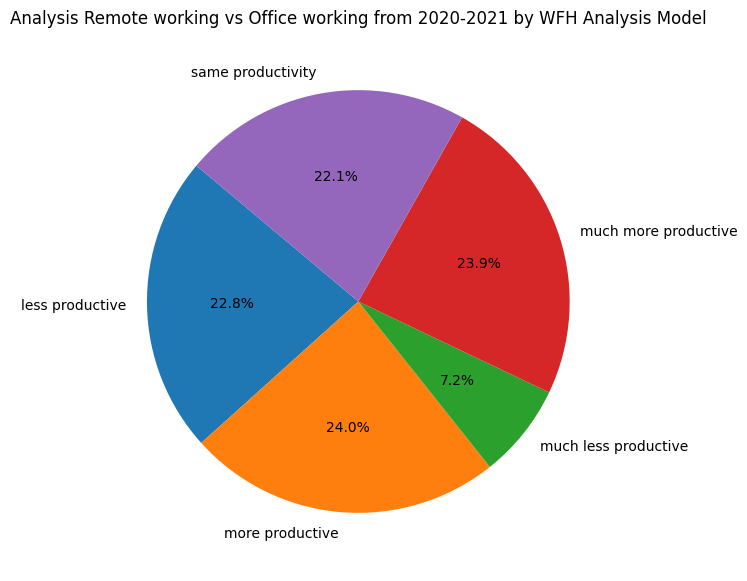

In [ ]:
import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(6, 7))  # Set the size of the plot
plt.pie(sizes_acc, labels=labels, autopct='%1.1f%%', startangle=140)  # Create the pie chart
plt.title('Analysis Remote working vs Office working from 2020-2021 by WFH Analysis Model')  # Add a title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()